<a href="https://colab.research.google.com/github/Tamanna013/placement_predictor/blob/main/Placement_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns

In [76]:
data=pd.read_csv('Placement.csv')

In [77]:
warnings.filterwarnings('ignore')

In [78]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [79]:
data.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,0,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,0,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [80]:
data.shape

(215, 15)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [82]:
data.isnull()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [83]:
data.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [84]:
data[data.duplicated(data.columns[:-1])]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary


In [85]:
data['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [86]:
data['status'].value_counts()

,count
status,
Placed,148
Not Placed,67


In [87]:
data['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [88]:
data[(data['degree_t']=="Sci&Tech") & (data['status']=="Placed")].sort_values(by='salary', ascending=False).head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
150,151,0,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
174,175,0,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
163,164,0,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
77,78,0,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
53,54,0,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


In [89]:
data=data.drop(['sl_no', 'salary'], axis=1)

In [90]:
data.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed


In [91]:
data['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [92]:
data['ssc_b']=data['ssc_b'].map({'Central':1, 'Others':0})

In [93]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,1,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,1,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,1,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [94]:
data['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [95]:
data['hsc_b']=data['hsc_b'].map({'Central':1, 'Others':0})

In [96]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,1,68.00,1,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,1,52.00,1,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,1,73.60,1,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [97]:
data['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [98]:
data['hsc_s']=data['hsc_s'].map({'Commerce':1, 'Science':2, 'Arts':0})

In [99]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,1,68.00,1,0,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,1,52.00,1,2,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,1,73.60,1,1,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [100]:
data['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [101]:
data['degree_t']=data['degree_t'].map({'Sci&Tech':2, 'Others':0, 'Comm&Mgmt':1})

In [102]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,2,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,1,68.00,1,0,64.00,1,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,1,52.00,1,2,52.00,2,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,1,73.60,1,1,73.30,1,No,96.8,Mkt&Fin,55.50,Placed


In [103]:
data['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [104]:
data['specialisation']=data['specialisation'].map({'Mkt&HR':1, 'Mkt&Fin':0})

In [105]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,No,55.0,1,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,2,Yes,86.5,0,66.28,Placed
2,0,65.00,1,68.00,1,0,64.00,1,No,75.0,0,57.80,Placed
3,0,56.00,1,52.00,1,2,52.00,2,No,66.0,1,59.43,Not Placed
4,0,85.80,1,73.60,1,1,73.30,1,No,96.8,0,55.50,Placed


In [106]:
data['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [107]:
data['workex']=data['workex'].map({'Yes':1, 'No':2})

In [108]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,2,55.0,1,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,Placed
2,0,65.00,1,68.00,1,0,64.00,1,2,75.0,0,57.80,Placed
3,0,56.00,1,52.00,1,2,52.00,2,2,66.0,1,59.43,Not Placed
4,0,85.80,1,73.60,1,1,73.30,1,2,96.8,0,55.50,Placed


In [109]:
data['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [110]:
data['status']=data['status'].map({'Placed':1, 'Not Placed':0})

In [111]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,2,55.0,1,58.80,1
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,1
2,0,65.00,1,68.00,1,0,64.00,1,2,75.0,0,57.80,1
3,0,56.00,1,52.00,1,2,52.00,2,2,66.0,1,59.43,0
4,0,85.80,1,73.60,1,1,73.30,1,2,96.8,0,55.50,1


In [112]:
X=data.drop('status', axis=1)
y=data['status']

In [113]:
X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0,67.00,0,91.00,0,1,58.00,2,2,55.0,1,58.80
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28
2,0,65.00,1,68.00,1,0,64.00,1,2,75.0,0,57.80
3,0,56.00,1,52.00,1,2,52.00,2,2,66.0,1,59.43
4,0,85.80,1,73.60,1,1,73.30,1,2,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,0,82.00,0,1,77.60,1,2,91.0,0,74.49
211,0,58.00,0,60.00,0,2,72.00,2,2,74.0,0,53.62
212,0,67.00,0,67.00,0,1,73.00,1,1,59.0,0,69.72
213,1,74.00,0,66.00,0,1,58.00,1,2,70.0,1,60.23


In [114]:
y

,status
0,1
1,1
2,1
3,0
4,1
...,...
210,1
211,1
212,1
213,1


In [115]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

In [116]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gb=GradientBoostingClassifier()
svm=svm.SVC()

In [117]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
gb.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

In [118]:
y_pred_lr=lr.predict(X_test)
y_pred_dt=dt.predict(X_test)
y_pred_rf=dt.predict(X_test)
y_pred_knn=knn.predict(X_test)
y_pred_gb=gb.predict(X_test)
y_pred_svm=svm.predict(X_test)

In [119]:
score_lr=accuracy_score(y_test, y_pred_lr)
score_dt=accuracy_score(y_test, y_pred_dt)
score_rf=accuracy_score(y_test, y_pred_rf)
score_knn=accuracy_score(y_test, y_pred_knn)
score_gb=accuracy_score(y_test, y_pred_gb)
score_svm=accuracy_score(y_test, y_pred_svm)

In [120]:
print(score_lr)

0.8837209302325582


In [121]:
print(score_dt)

0.8372093023255814


In [122]:
print(score_rf)

0.8372093023255814


In [123]:
print(score_knn)

0.7906976744186046


In [124]:
print(score_gb)

0.813953488372093


In [125]:
print(score_svm)

0.7674418604651163


In [126]:
final_data=pd.DataFrame({'Models':['LR', 'DT', 'RF', 'KNN', 'GB', 'SVM'], 'Score':[score_lr*100, score_dt*100, score_rf*100, score_knn*100, score_gb*100, score_svm*100]})

In [127]:
final_data

,Models,Score
0,LR,88.372093
1,DT,83.720930
2,RF,83.720930
3,KNN,79.069767
4,GB,81.395349
5,SVM,76.744186


<Axes: xlabel='Models', ylabel='Score'>

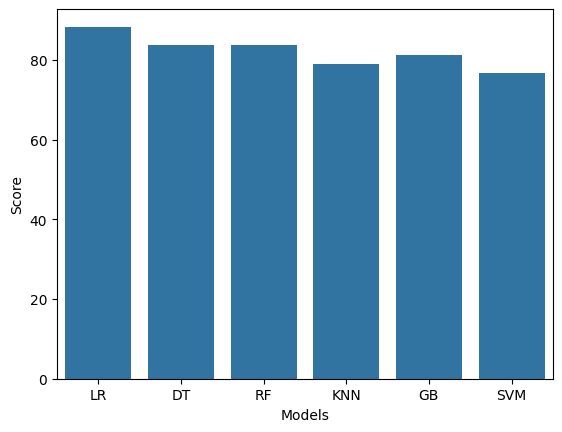

In [128]:
sns.barplot(x='Models', y='Score', data=final_data)

Prediction on new data

In [129]:
new_data=pd.DataFrame({
    'gender':1,
    'ssc_p':67.0,
    'ssc_b':0,
    'hsc_p':91.0,
    'hsc_b':0,
    'hsc_s':1,
    'degree_p':58.0,
    'degree_t':2,
    'workex':0,
    'etest_p':55.0,
    'specialisation':0,
    'mba_p':58.8
}, index=[0]
)

In [130]:
new_data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.0,0,91.0,0,1,58.0,2,0,55.0,0,58.8


In [131]:
lr=LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [132]:
p=lr.predict(new_data)
prob=lr.predict_proba(new_data)
if p[0]==0:
  print(f'Not Placed Probability: {prob[0][0]}')
else:
  print(f'Placed Probability: {prob[0][1]}')

Placed Probability: 0.9989434534223556
